## Explore- Cluster Exercises

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

#import data
from wrangle import wrangle_zillow
import wrangle

### Exercise 1)
Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [2]:
#calling in data
df = wrangle_zillow()

#removing un-needed columns
cols_to_remove = ['heatingorsystemtypeid','parcelid','storytypeid','typeconstructiontypeid','airconditioningtypeid','propertylandusetypeid','architecturalstyletypeid','id','buildingclasstypeid','buildingqualitytypeid','decktypeid','pooltypeid10','pooltypeid2','pooltypeid7','taxamount','taxdelinquencyflag','taxdelinquencyyear','id']
df = wrangle.remove_columns(df, cols_to_remove)


df = wrangle.handle_missing_values(df)

df.head()

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,censustractandblock,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc
0,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,...,1998.0,485713.0,1023282.0,2016.0,537569.0,6.059063e+13,0.025595,2017-01-01,Single Family Residential,None
1,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,...,1967.0,88000.0,464000.0,2016.0,376000.0,6.111001e+13,0.055619,2017-01-01,Single Family Residential,None
2,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,...,1962.0,85289.0,564778.0,2016.0,479489.0,6.059022e+13,0.005383,2017-01-01,Single Family Residential,None
3,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,...,1970.0,108918.0,145143.0,2016.0,36225.0,6.037300e+13,-0.103410,2017-01-01,Single Family Residential,Central
4,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,63000.0,...,1950.0,276684.0,773303.0,2016.0,496619.0,6.037461e+13,-0.001011,2017-01-01,Single Family Residential,Central


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52375 entries, 0 to 52440
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   52375 non-null  float64
 1   bedroomcnt                    52375 non-null  float64
 2   calculatedbathnbr             52304 non-null  float64
 3   calculatedfinishedsquarefeet  52359 non-null  float64
 4   finishedsquarefeet12          52194 non-null  float64
 5   fips                          52375 non-null  float64
 6   fullbathcnt                   52304 non-null  float64
 7   latitude                      52375 non-null  float64
 8   longitude                     52375 non-null  float64
 9   lotsizesquarefeet             52015 non-null  float64
 10  propertycountylandusecode     52375 non-null  object 
 11  propertyzoningdesc            33836 non-null  object 
 12  rawcensustractandblock        52375 non-null  float64
 13  r

In [4]:
df.isnull().sum()

bathroomcnt                         0
bedroomcnt                          0
calculatedbathnbr                  71
calculatedfinishedsquarefeet       16
finishedsquarefeet12              181
fips                                0
fullbathcnt                        71
latitude                            0
longitude                           0
lotsizesquarefeet                 360
propertycountylandusecode           0
propertyzoningdesc              18539
rawcensustractandblock              0
regionidcity                     1031
regionidcounty                      0
regionidzip                        23
roomcnt                             0
unitcnt                         18528
yearbuilt                          50
structuretaxvaluedollarcnt         75
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
censustractandblock               114
logerror                            0
transactiondate                     0
propertyland

In [5]:
#note: will just drop nulls for now as some are so small it doesn't matter, and others are so large, it would 
#be hard to determine where to put (doesn't quite fit in mean)

#df=df.dropna(subset=['calculatedfinishedsquarefeet','finishedsquarefeet12','yearbuilt','structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','censustractandblock','propertyzoningdesc','heatingorsystemdesc'])
#df.isnull().sum()

In [6]:
from sklearn.model_selection import train_test_split

def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on taxvaluedollarcnt.
    return train, validate, test DataFrames.
    '''


    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify = df.fips)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123)
    return train, validate, test

train, validate, test = split_data(df)

> # Questions:

- 1) What is the distribution of each variable?
- 2) Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
- 3) Is logerror different between number of baths vs bedroom vs squarefeet?
- 4) Is logerror different when it comes to lotsize?
- 5) Does logerror match/relate to taxvaluedollar amount?

># Answer the Questions

### Question 1):
What is the distribution of each variable?

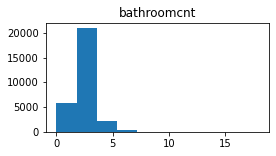

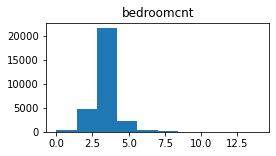

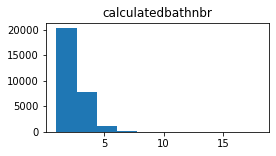

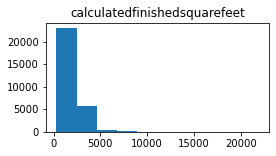

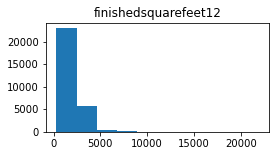

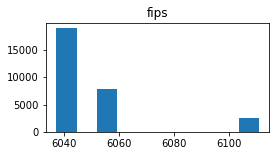

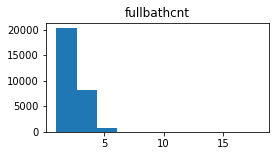

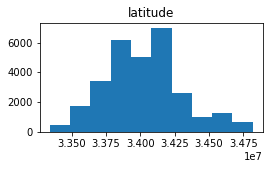

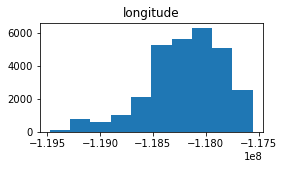

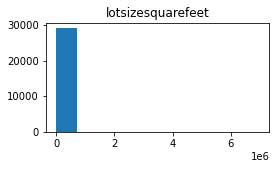

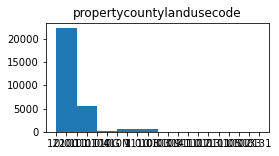

TypeError: '<=' not supported between instances of 'NoneType' and 'NoneType'

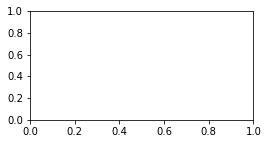

In [7]:
#create all the histograms:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

#### Conclusion:
- Mostly normally distributed: bedroomcnt, yearbuilt
- Skewed right: transactiondate, regionidcity,propertyzoningdesc,latitude,fullbathcnt,finishedsqft,calculatedbathbr,bathcnt

### Questions 2):
Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [11]:
train.fips.value_counts()

6037.0    18992
6059.0     7861
6111.0     2477
Name: fips, dtype: int64

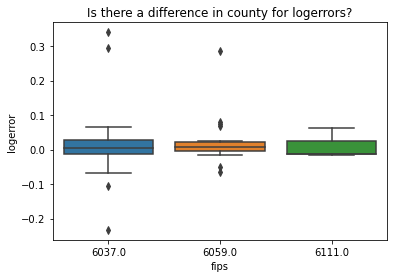

In [19]:
#plotting fips to logerror
sample = train.sample(50)
sns.boxplot(sample.fips, sample.logerror)
plt.title("Is there a difference in county for logerrors?")
plt.show()

#### Take away: The plot doesn't really show anything conclusive. 

In [20]:
#will do a 2 t sample of LA to not LA and vice versa for each county

logerror,-4.655420,-2.406257,-2.387800,-2.311473,-2.300184,-2.283534,-2.283001,-2.271428,-2.267302,-2.241126,...,2.380401,2.381483,2.461684,2.479045,2.508444,2.523992,2.670239,2.933328,3.084717,3.175688
fips,,,,,,,,,,,,,,,,,,,,,
6037.0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,0,1,1
6059.0,0,1,1,0,1,1,1,0,1,0,...,1,1,1,0,0,0,0,1,0,0
6111.0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Question 3):
Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?